In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#NULL
#THER IS NO DIFFERENCE BETWEEN ANY OF THE 5 TREATMENST
#ALTERNATIVE
#THERE IS DIFFERENCE BETWEEN ANY OF THE 5 TREATMENTS

# Comparison of 5 Treatments to Reduce Mosquito/Human Contact

The problem: How do we know if any of the 5 treatments are statistically significant?

The solution: ANOVA - are any of the treatments significantly different than the rest?

# Dataset:  mosquito.csv

Source: A. Bhatnagar and V.K. Mehta (2007). "Efficacy of Deltamethrin and
Cyfluthrin Impregnated Cloth Over Uniform Against Mosquito Bites,"
Medical Journal Armed Forces India, Vol. 63, pp. 120-122.

Description: Comparison of 5 pretreated patches to reduce mosquito human
contact. 30 replicates per treatment.
Treatments:
1=Odomos, 2=Deltamethrin, 3=Cyfluthrin, 4=D+O, 5=C+O

Variables:
treatment
mosq - The number of mosquitoes caught in one hour (Per Man-Hour Mosquito Catch)


In [4]:
# Our Clean Netflix data (CSV)
output_data_file = "NetflixDF4.csv"

# Read the CSV
netflix_df = pd.read_csv(output_data_file)

# Display the data table for preview
netflix_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0


In [5]:
# create my 3 different data frames for one genre and each country

In [6]:

india_df = netflix_df.loc[(netflix_df['country'] == 'India')]
india_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
16,s106,Angamaly Diaries,2017,Movie,PG-13,India,Action & Adventure,128.0
18,s115,Anjaam,1994,Movie,PG-13,India,Dramas,143.0
20,s117,Dhanak,2015,Movie,PG,India,Comedies,114.0
22,s119,Gurgaon,2017,Movie,PG-13,India,Dramas,106.0


In [7]:
uk_df = netflix_df.loc[(netflix_df['country'] == 'United Kingdom')]
uk_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90.0
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119.0
21,s118,Final Account,2021,Movie,PG-13,United Kingdom,Documentaries,94.0
23,s123,In the Cut,2003,Movie,R,United Kingdom,Thrillers,118.0
40,s156,Labyrinth,1986,Movie,PG,United Kingdom,Action & Adventure,101.0


In [8]:
us_df = netflix_df.loc[(netflix_df['country'] == 'United States')]
us_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0


In [9]:
netflix_df.groupby("genre").agg({"duration": ["mean", "std", "var", "count"]}, axis=1)

duration                              
                                mean        std          var count
genre                                                             
Action & Adventure        116.882704  24.529845   601.713306   503
Anime Features             42.000000        NaN          NaN     1
Children & Family Movies   86.896024  19.465280   378.897131   327
Classic Movies            122.000000  38.721704  1499.370370    55
Comedies                  110.466077  23.003908   529.179793   678
Cult Movies               103.636364  23.157170   536.254545    11
Documentaries              85.370874  19.936288   397.455570   515
Dramas                    115.161255  23.976039   574.850458   924
Horror Movies              96.117647  13.940628   194.341107   170
Independent Movies         98.833333   7.237565    52.382353    18
International Movies      122.023810  22.385196   501.096980    42
Music & Musicals           90.928571  32.276365  1041.763736    14
Romantic Movies            83.000000   2.828427     8.000000     2
Sci-Fi & Fantasy          108.900000  13.093255   171.433333    10
Sports Movies              87.000000        NaN          NaN     1
Stand-Up Comedy            67.545455  11.258479   126.753360   231
Thrillers                 100.428571  15.474151   239.449351    56

<AxesSubplot:title={'center':'duration'}, xlabel='country'>

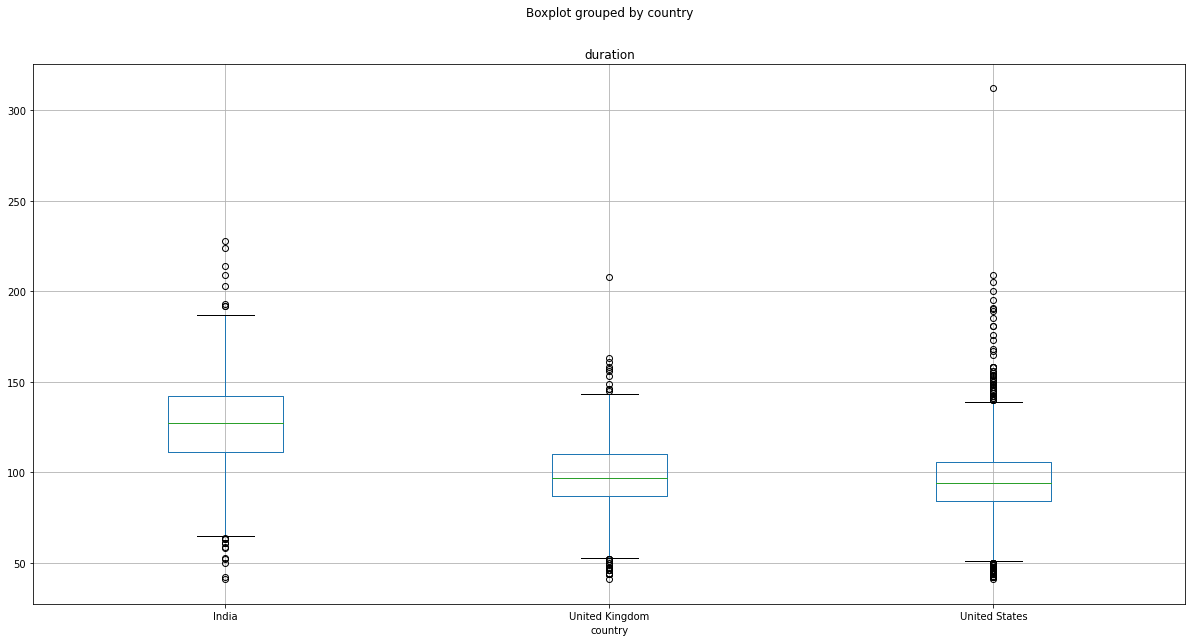

In [10]:
# Create a boxplot to compare means all genres
netflix_df.boxplot("duration", by="country", figsize=(20, 10))

In [11]:

# Extract individual groups
group1 = netflix_df[netflix_df["country"] == "United States"]["duration"]
group2 = netflix_df[netflix_df["country"] == "United Kingdom"]["duration"]
group3 = netflix_df[netflix_df["country"] == "India"]["duration"]


In [12]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=652.2672998159755, pvalue=4.958573394632441e-242)

In [13]:
stats.ttest_ind(group1, group2, equal_var=True)

Ttest_indResult(statistic=-2.326536892039025, pvalue=0.02006550622592112)

# need to just get the genre horror for countries

In [14]:
horror_df = netflix_df.loc[(netflix_df['genre'] == 'Horror Movies')]
horror_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0
77,s211,Ragini MMS,2011,Movie,R,India,Horror Movies,93.0
78,s212,Ragini MMS 2,2014,Movie,R,India,Horror Movies,113.0
84,s230,The Old Ways,2020,Movie,R,United States,Horror Movies,90.0
99,s308,Aftermath,2021,Movie,R,United States,Horror Movies,115.0


<AxesSubplot:title={'center':'duration'}, xlabel='country'>

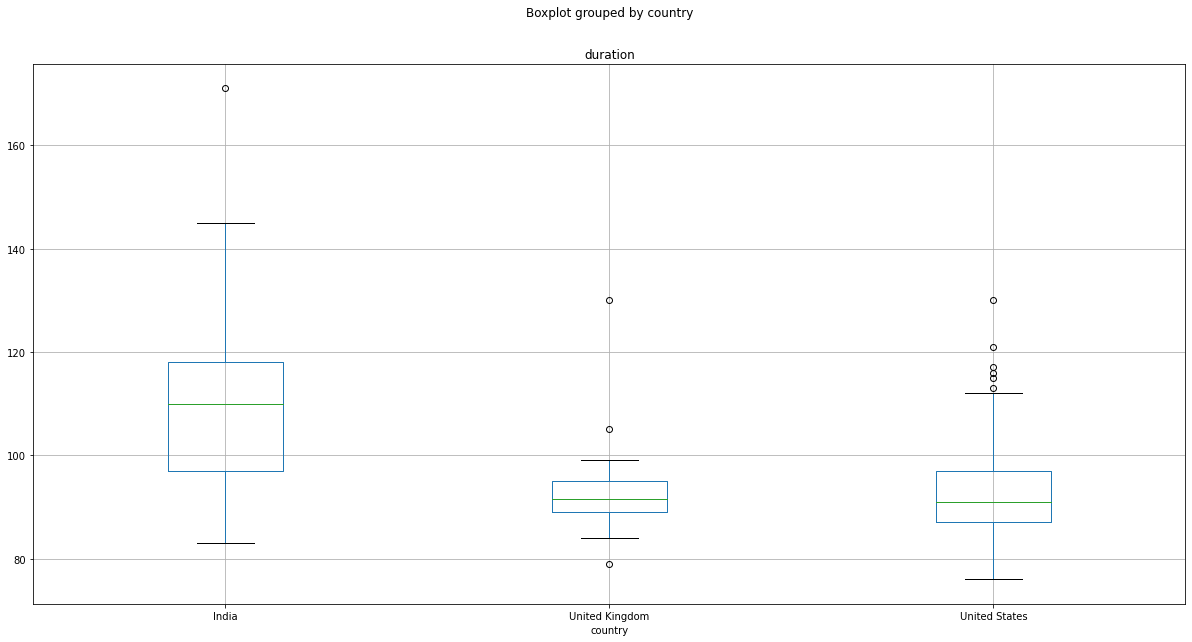

In [15]:
# Create a boxplot to compare means
horror_df.boxplot("duration", by="country", figsize=(20, 10))

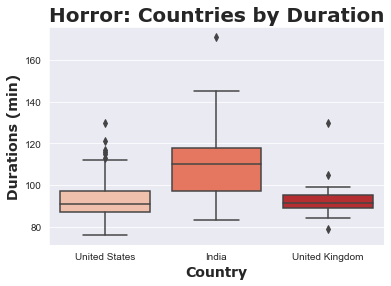

In [55]:
sns.set_style("darkgrid")
  
sns.boxplot(x = 'country', y = 'duration', data = horror_df, palette="Reds")
plt.title("Horror: Countries by Duration", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Country', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Durations (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("ANNOVA HORROR.png")
plt.show()

In [16]:

# Extract individual groups
group1 = horror_df[horror_df["country"] == "United States"]["duration"]
group2 = horror_df[horror_df["country"] == "United Kingdom"]["duration"]
group3 = horror_df[horror_df["country"] == "India"]["duration"]

stats.ttest_ind(group1, group2, equal_var=True)

Ttest_indResult(statistic=-0.3923435373234593, pvalue=0.6954097017553829)

# need to just get the genre Dramas for countries

In [17]:
drama_df = netflix_df.loc[(netflix_df['genre'] == 'Dramas')]
drama_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
8,s43,Jaws 2,1978,Movie,PG,United States,Dramas,116.0
11,s49,Training Day,2001,Movie,R,United States,Dramas,122.0
18,s115,Anjaam,1994,Movie,PG-13,India,Dramas,143.0
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119.0


<AxesSubplot:title={'center':'duration'}, xlabel='country'>

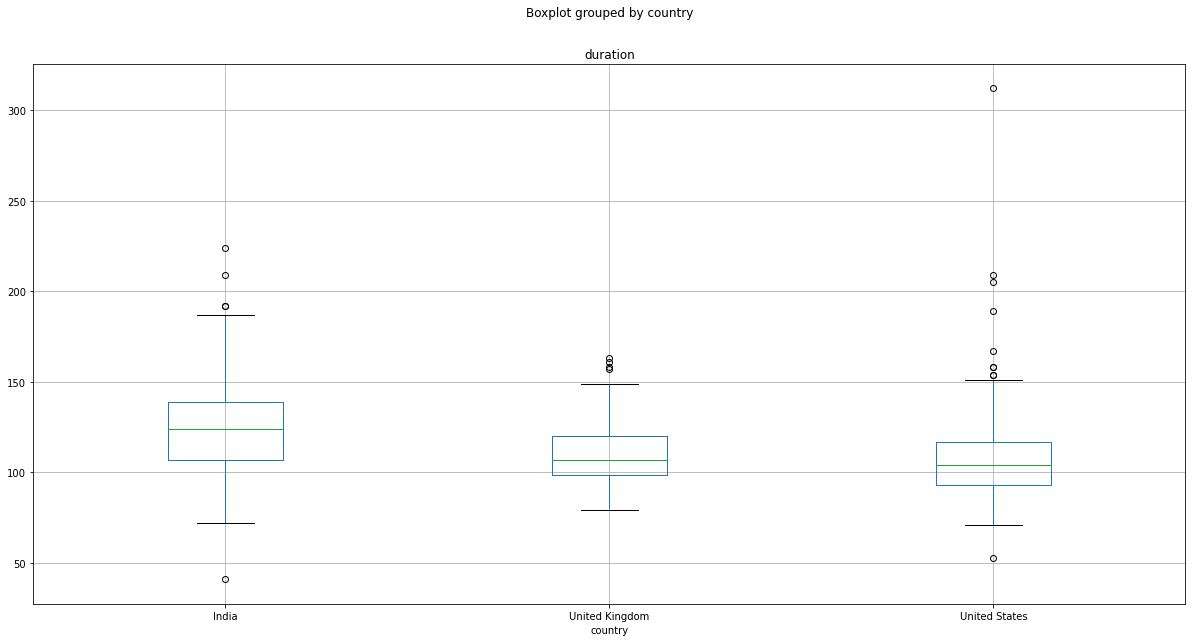

In [18]:
# Create a boxplot to compare means
drama_df.boxplot("duration", by="country", figsize=(20, 10))

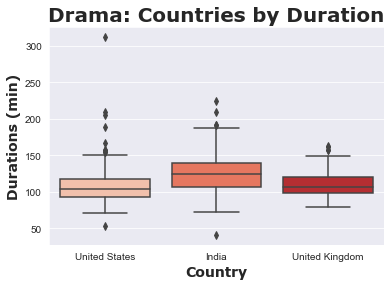

In [53]:
sns.set_style("darkgrid")
  
sns.boxplot(x = 'country', y = 'duration', data = drama_df, palette="Reds")
plt.title("Drama: Countries by Duration", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Country', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Durations (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("ANNOVA DRAMA.png")
plt.show()

In [19]:

# Extract individual groups
group1 = drama_df[drama_df["country"] == "United States"]["duration"]
group2 = drama_df[drama_df["country"] == "United Kingdom"]["duration"]
group3 = drama_df[drama_df["country"] == "India"]["duration"]

stats.ttest_ind(group1, group2, equal_var=True)

Ttest_indResult(statistic=-1.6113572098903137, pvalue=0.10771100114860035)

# need to just get the genre Action and Adventure for countries

In [20]:
aa_df = netflix_df.loc[(netflix_df['genre'] == 'Action & Adventure')]
aa_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
7,s42,Jaws,1975,Movie,PG,United States,Action & Adventure,124.0
9,s44,Jaws 3,1983,Movie,PG,United States,Action & Adventure,98.0
10,s45,Jaws: The Revenge,1987,Movie,PG-13,United States,Action & Adventure,91.0
12,s82,Kate,2021,Movie,R,United States,Action & Adventure,106.0
16,s106,Angamaly Diaries,2017,Movie,PG-13,India,Action & Adventure,128.0


<AxesSubplot:title={'center':'duration'}, xlabel='country'>

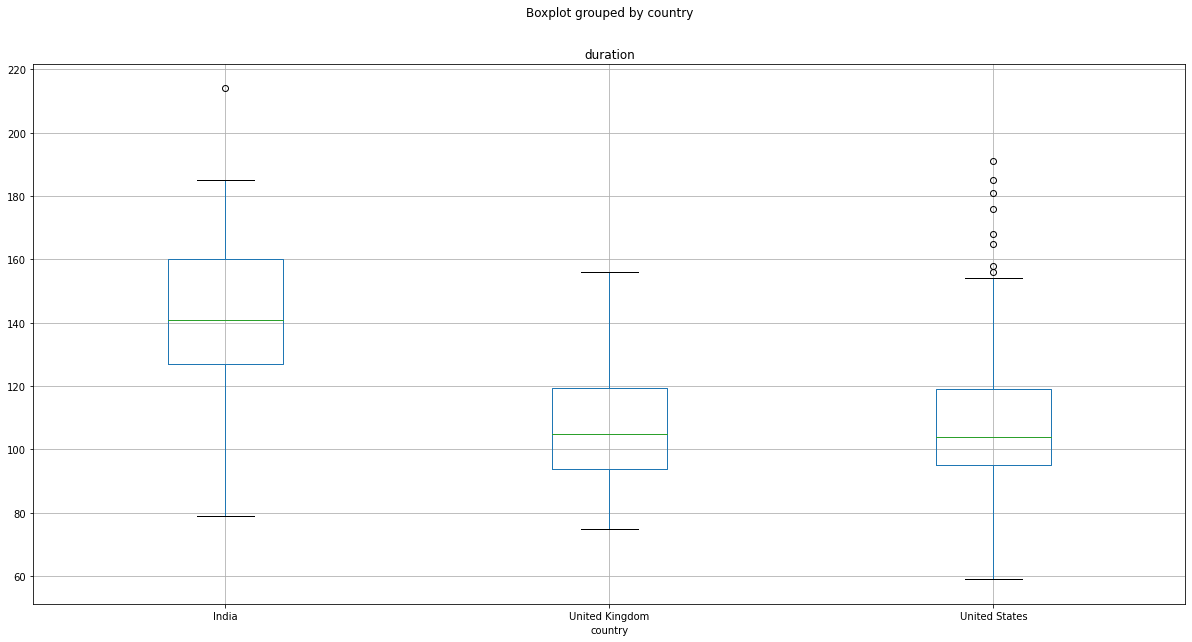

In [21]:
# Create a boxplot to compare means
aa_df.boxplot("duration", by="country", figsize=(20, 10))

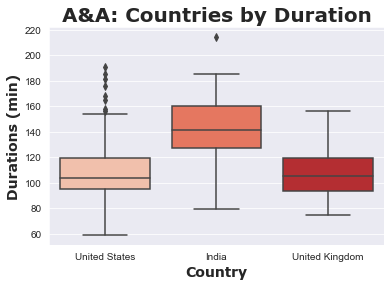

In [54]:
sns.set_style("darkgrid")
  
sns.boxplot(x = 'country', y = 'duration', data = aa_df, palette="Reds")
plt.title("A&A: Countries by Duration", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Country', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Durations (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("ANNOVA A&A.png")
plt.show()

In [22]:

# Extract individual groups
group1 = aa_df[aa_df["country"] == "United States"]["duration"]
group2 = aa_df[aa_df["country"] == "United Kingdom"]["duration"]
group3 = aa_df[aa_df["country"] == "India"]["duration"]

stats.ttest_ind(group1, group2, equal_var=True)

Ttest_indResult(statistic=0.40707701583594236, pvalue=0.6841861826376556)